In [61]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [44]:
img=Image.open(r'Datasets\Img\satellite_iamge_classification\data\water\SeaLake_65.jpg')
img.size

(64, 64)

In [39]:
data=tf.keras.utils.image_dataset_from_directory(r'Datasets\Img\satellite_iamge_classification\data',image_size=(64,64),color_mode='rgb',batch_size=5631)

Found 5631 files belonging to 4 classes.


In [57]:
model=tf.keras.Sequential([
    layers.Conv2D(16,3,input_shape=(64,64,3),activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(48,3,activation='leaky_relu'),
    layers.MaxPool2D(), 
    layers.Flatten(),
    layers.Dense(16,'relu'),
    layers.Dense(4,'softmax')
])

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 48)        13872     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 6, 6, 48)        

In [59]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [60]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,4)
    record=model.fit(features,labels,batch_size=50,epochs=30)
    

Epoch 1/30
113/113 [==============================] - 16s 130ms/step - loss: 0.5089 - accuracy: 0.7199
Epoch 2/30
113/113 [==============================] - 14s 128ms/step - loss: 0.2266 - accuracy: 0.9030
Epoch 3/30
113/113 [==============================] - 15s 128ms/step - loss: 0.1551 - accuracy: 0.9412
Epoch 4/30
113/113 [==============================] - 14s 126ms/step - loss: 0.1630 - accuracy: 0.9295
Epoch 5/30
113/113 [==============================] - 14s 127ms/step - loss: 0.1312 - accuracy: 0.9453
Epoch 6/30
113/113 [==============================] - 15s 129ms/step - loss: 0.1202 - accuracy: 0.9499
Epoch 7/30
113/113 [==============================] - 14s 127ms/step - loss: 0.1069 - accuracy: 0.9586
Epoch 8/30
113/113 [==============================] - 14s 126ms/step - loss: 0.1203 - accuracy: 0.9505
Epoch 9/30
113/113 [==============================] - 15s 137ms/step - loss: 0.1355 - accuracy: 0.9449
Epoch 10/30
113/113 [==============================] - 16s 139ms/step - l

In [68]:
tf.keras.models.save_model(model,'./../Datasets/models/satellite_image_classification.h5')

In [53]:
model=tf.keras.models.load_model('./../Datasets/models/satellite_image_classification.h5')

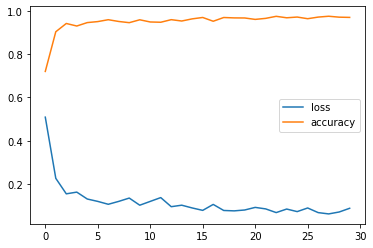

In [79]:
plt.plot(record.history['loss'],label='loss')
plt.plot(record.history['accuracy'],label='accuracy')
plt.legend()
plt.show()